In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import json
import pickle
import joblib

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1624,Plot Area,Ready To Move,Kereguddadahalli,6 Bedroom,NaN,600,4.0,0.0,60.00
11167,Built-up Area,Ready To Move,ISRO Layout,2 BHK,NaN,1200,2.0,3.0,43.00
4831,Super built-up Area,Ready To Move,Ambalipura,2 BHK,NaN,1230,2.0,2.0,66.25
655,Super built-up Area,Ready To Move,Bommasandra,3 BHK,Vaodspe,1200,3.0,2.0,46.00
2723,Super built-up Area,20-Mar,8th Phase JP Nagar,3 BHK,Vaarech,1455,3.0,2.0,73.31


In [3]:
df=df.drop(['availability','society'],axis=1)
df.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price
4976,Super built-up Area,Ramagondanahalli,2 BHK,1295,2.0,2.0,95.0
5156,Built-up Area,Hebbal,3 BHK,1269,2.0,1.0,73.0
2034,Super built-up Area,Budigere,2 BHK,1139,2.0,2.0,62.0
2917,Super built-up Area,Bellandur,2 BHK,900,2.0,2.0,56.0
7359,Built-up Area,Yelahanka,2 BHK,1200,2.0,2.0,55.0


In [4]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [7]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [8]:
def size_clear(string):
    string=string.split(' ')[0]
    string=int(string)
    return string

In [9]:
df['size']=df['size'].apply(size_clear)
df

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,Super built-up Area,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,Built-up Area,Whitefield,5,3453,4.0,0.0,231.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4.0,1.0,488.00


In [10]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [11]:
df['balcony'].unique()

array([1., 3., 2., 0.])

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def correcting_total_sqft(val):
    x=None
    try:
        x=float(val)
    except:
        try:
            x_list=list(val.strip(' - '))
            
            x=(float(x_list[0])+float(x_list[1]))/2
        except:
            x=None
    return x

In [14]:
df['total_sqft']=df['total_sqft'].apply(correcting_total_sqft)

In [15]:
df['total_sqft'].isnull().sum()

8

In [16]:
df=df.dropna()

In [17]:
df['total_sqft'].isnull().sum()

0

In [18]:
df.shape

(12702, 7)

In [19]:
df['location'].nunique()

1262

In [20]:
locations=df.groupby('location')['location'].count().sort_values(ascending=False)
locations

location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1262, dtype: int64

In [21]:
len(locations[locations<=10])

1025

In [22]:
rare_locs=locations[locations<=10]

In [23]:
def loc_assign(loc):
    if loc in rare_locs:
        return 'other'
    else:
        return loc

In [24]:
df['location']=df['location'].apply(loc_assign)

C:\Users\hp\AppData\Local\Temp\ipykernel_3160\4263921389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location']=df['location'].apply(loc_assign)


In [25]:
df['location'].nunique()

238

In [26]:
df.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price
10838,Built-up Area,6th Phase JP Nagar,1,750.0,1.0,1.0,105.00
5140,Super built-up Area,Mysore Road,2,1070.0,2.0,1.0,49.65
11192,Plot Area,Raja Rajeshwari Nagar,4,1560.0,4.0,1.0,160.00
5467,Super built-up Area,other,3,2250.0,3.0,1.0,113.00
3791,Super built-up Area,Raja Rajeshwari Nagar,3,1530.0,3.0,3.0,51.77


In [27]:
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

C:\Users\hp\AppData\Local\Temp\ipykernel_3160\2261337584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft']=(df['price']*100000)/df['total_sqft']


In [28]:
df.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
6584,Super built-up Area,Bisuvanahalli,3,1075.0,2.0,1.0,41.00,3813.953488
352,Carpet Area,other,3,1592.0,3.0,2.0,75.00,4711.055276
1855,Super built-up Area,other,4,3675.0,4.0,3.0,367.00,9986.394558
6600,Built-up Area,other,8,2500.0,8.0,3.0,95.00,3800.000000
1696,Built-up Area,other,2,1090.0,2.0,1.0,31.48,2888.073394


In [29]:
df[df['location']=='other']['location'].count()

2749

In [30]:
df.shape

(12702, 8)

In [31]:
df1=df.copy()
df1=df1[(df1['total_sqft']/df['size'])>300]
df1.shape

(11703, 8)

In [32]:
df1['price_per_sqft'].describe()

count     11703.000000
mean       6135.971418
std        3913.970287
min         267.829813
25%        4185.898574
50%        5238.319962
75%        6764.705882
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def filtering_price_per_sqft(df):
    final_df=pd.DataFrame()
    for loc,subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        sd=np.std(subdf['price_per_sqft'])
        pre_final_df=subdf[(subdf['price_per_sqft']>(m-sd)) & (subdf['price_per_sqft']<=(m+sd))]
        final_df=pd.concat([final_df,pre_final_df],ignore_index=True)
        
    return final_df

In [34]:
df1=filtering_price_per_sqft(df1)
df1.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
3230,Super built-up Area,Indira Nagar,2,1145.0,2.0,2.0,100.00,8733.624454
1642,Super built-up Area,Doddakallasandra,2,1010.0,2.0,1.0,40.39,3999.009901
8763,Built-up Area,other,4,2200.0,3.0,0.0,115.00,5227.272727
7501,Super built-up Area,other,2,1000.0,2.0,1.0,53.00,5300.000000
9482,Super built-up Area,other,2,1260.0,2.0,1.0,55.00,4365.079365


In [35]:
df1.shape

(9569, 8)

In [36]:
def bhks_price_analysis(df,loc):
    df_2bhk=df[(df['size']==2) & (df['location']==loc)]
    df_3bhk=df[(df['size']==3) & (df['location']==loc)]
    plt.scatter(df_2bhk['total_sqft'],df_2bhk['price_per_sqft'],label='2 BHK')
    plt.scatter(df_3bhk['total_sqft'],df_3bhk['price_per_sqft'],label='3 BHK')
    plt.xlabel('Total Sqft')
    plt.ylabel('Total Price')
    plt.title(loc)
    plt.legend()

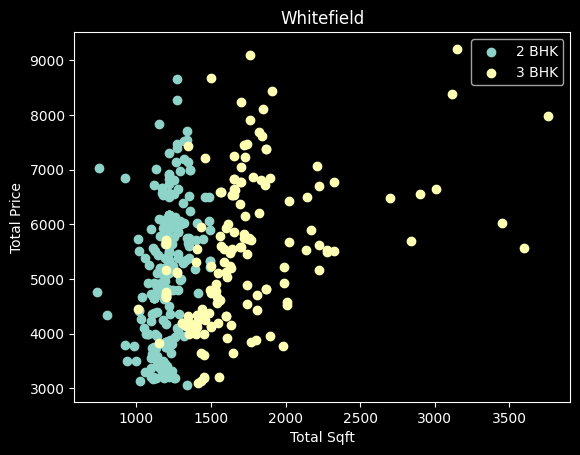

In [37]:
bhks_price_analysis(df1,"Whitefield")

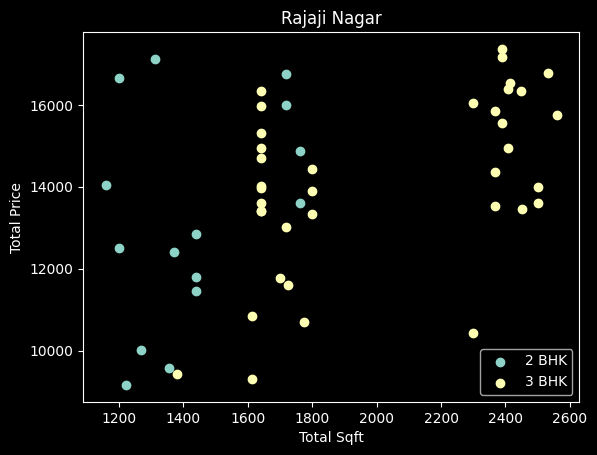

In [38]:
bhks_price_analysis(df1,"Rajaji Nagar")

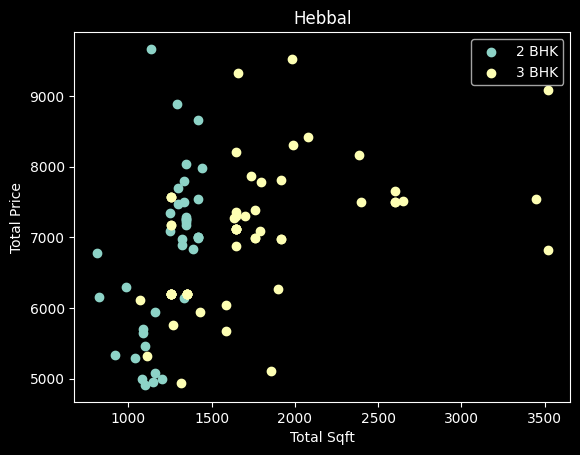

In [39]:
bhks_price_analysis(df1,"Hebbal")

In [40]:
def price_per_sqft_outlier_remover(df):
    eliminations=np.array([])
    for loc,loc_df in df.groupby('location'):
        bhk_stats=dict()
        for bhk,bhk_df in loc_df.groupby('size'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df['price_per_sqft']),
                'count':bhk_df.shape[0]
            }
        
        for bhk,bhk_df in loc_df.groupby('size'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                eliminations=np.append(eliminations,bhk_df[(bhk_df['price_per_sqft']<stats['mean'])].index.values)
                
    return df.drop(eliminations,axis=0)

In [41]:
df2=price_per_sqft_outlier_remover(df1)

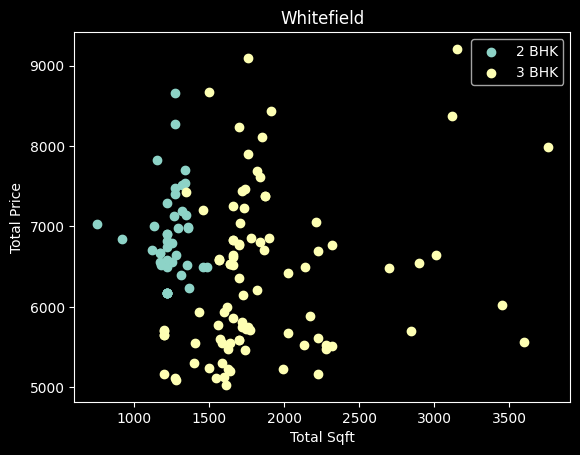

In [42]:
bhks_price_analysis(df2,"Whitefield")

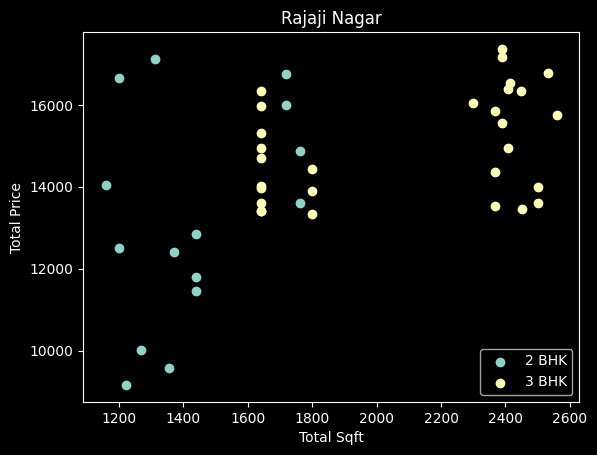

In [43]:
bhks_price_analysis(df2,"Rajaji Nagar")

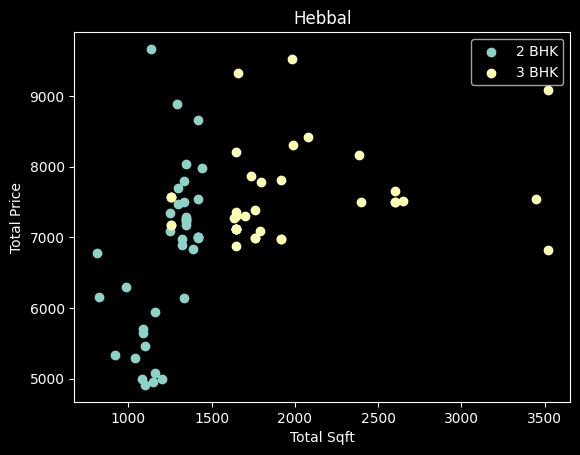

In [44]:
bhks_price_analysis(df2,"Hebbal")

In [45]:
df2.shape

(6803, 8)

In [46]:
df2[df2['bath']>df2['size']+2]

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
1489,Built-up Area,Chikkabanavar,4,2460.0,7.0,2.0,80.0,3252.032520
6261,Super built-up Area,Thanisandra,3,1806.0,6.0,2.0,116.0,6423.034330
7852,Super built-up Area,other,6,11338.0,9.0,1.0,1000.0,8819.897689


In [47]:
df2=df2[df2['bath']<=df2['size']+2]
df2.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
2459,Super built-up Area,Haralur Road,3,1520.0,2.0,2.0,85.0,5592.105263
2888,Super built-up Area,Hennur Road,2,1232.0,2.0,1.0,80.0,6493.506494
8362,Plot Area,other,3,1365.0,3.0,0.0,99.0,7252.747253
1703,Super built-up Area,EPIP Zone,2,1285.0,2.0,2.0,82.0,6381.322957
2926,Super built-up Area,Hoodi,2,1305.0,2.0,1.0,75.0,5747.126437


In [48]:
df2.shape

(6800, 8)

In [49]:
df2=df2.drop('area_type',axis=1)
df2.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,4540.654699


In [50]:
def strip_function(string):
    string=string.strip()
    return string

In [51]:
df2['location']=df2['location'].apply(strip_function)

In [52]:
df2.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,3418.803419
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.403509
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,4540.654699


In [53]:
df2.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [54]:
le=LabelEncoder()

In [55]:
df2['loc']=le.fit_transform(df2['location'])
df2.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft,loc
1,Devarachikkanahalli,2,1250.0,2.0,2.0,40.0,3200.000000,69
2,Devarachikkanahalli,2,1200.0,2.0,2.0,83.0,6916.666667,69
3,Devarachikkanahalli,2,1170.0,2.0,2.0,40.0,3418.803419,69
4,Devarachikkanahalli,3,1425.0,2.0,2.0,65.0,4561.403509,69
5,Devarachikkanahalli,2,947.0,2.0,2.0,43.0,4540.654699,69


In [56]:
df2['location'].nunique()

238

In [57]:
df2['loc'].nunique()

238

In [58]:
le_converter=dict()

In [59]:
for location,subdf in df2.groupby('location'):
    if location not in le_converter.keys():
        dfx=subdf.iloc[0]
        dfx=dfx['loc']
        le_converter[location]=dfx

In [60]:
le_converter

{'1st Block Jayanagar': 0,
 '1st Phase JP Nagar': 1,
 '2nd Phase Judicial Layout': 2,
 '2nd Stage Nagarbhavi': 3,
 '5th Phase JP Nagar': 4,
 '6th Phase JP Nagar': 5,
 '7th Phase JP Nagar': 6,
 '8th Phase JP Nagar': 7,
 '9th Phase JP Nagar': 8,
 'AECS Layout': 9,
 'Abbigere': 10,
 'Akshaya Nagar': 11,
 'Ambalipura': 12,
 'Ambedkar Nagar': 13,
 'Amruthahalli': 14,
 'Anandapura': 15,
 'Ananth Nagar': 16,
 'Anekal': 17,
 'Anjanapura': 18,
 'Ardendale': 19,
 'Arekere': 20,
 'Attibele': 21,
 'BEML Layout': 22,
 'BTM 2nd Stage': 23,
 'BTM Layout': 24,
 'Babusapalaya': 25,
 'Badavala Nagar': 26,
 'Balagere': 27,
 'Banashankari': 28,
 'Banashankari Stage II': 29,
 'Banashankari Stage III': 30,
 'Banashankari Stage V': 31,
 'Banashankari Stage VI': 32,
 'Banaswadi': 33,
 'Banjara Layout': 34,
 'Bannerghatta': 35,
 'Bannerghatta Road': 36,
 'Basavangudi': 37,
 'Basaveshwara Nagar': 38,
 'Battarahalli': 39,
 'Begur': 40,
 'Begur Road': 41,
 'Bellandur': 42,
 'Benson Town': 43,
 'Bharathi Nagar': 4

In [61]:
df3=df2.drop(['location','price_per_sqft'],axis=1)
df3.head()

,size,total_sqft,bath,balcony,price,loc
1,2,1250.0,2.0,2.0,40.0,69
2,2,1200.0,2.0,2.0,83.0,69
3,2,1170.0,2.0,2.0,40.0,69
4,3,1425.0,2.0,2.0,65.0,69
5,2,947.0,2.0,2.0,43.0,69


In [62]:
df3.shape

(6800, 6)

In [63]:
df2['loc'].unique()

array([ 69,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [64]:
df2['loc'].value_counts()

loc
237    1075
231     199
200     180
77      161
190     135
       ... 
3         4
159       4
34        3
228       3
165       3
Name: count, Length: 238, dtype: int64

In [65]:
df2['loc'].value_counts()[:10]

loc
237    1075
231     199
200     180
77      161
190     135
92      114
163     112
222     106
98       99
94       99
Name: count, dtype: int64

In [66]:
df2['loc'].value_counts()[:12]

loc
237    1075
231     199
200     180
77      161
190     135
92      114
163     112
222     106
98       99
94       99
215      97
78       90
Name: count, dtype: int64

In [67]:
df_shortlist1=df3[df3['loc'].isin({231,200,78})]
df_shortlist1.shape

(469, 6)

In [68]:
X=df_shortlist1.drop(['price'],axis=1)
X.head()

,size,total_sqft,bath,balcony,loc
1995,2,1056.0,2.0,1.0,78
1996,2,1020.0,2.0,1.0,78
1997,2,1069.0,2.0,2.0,78
1998,1,630.0,1.0,1.0,78
2000,2,1000.0,2.0,1.0,78


In [69]:
y=df_shortlist1['price']
y.head()

1995    39.07
1996    30.60
1997    45.00
1998    28.35
2000    25.00
Name: price, dtype: float64

In [70]:
df_shortlist1.head()

,size,total_sqft,bath,balcony,price,loc
1995,2,1056.0,2.0,1.0,39.07,78
1996,2,1020.0,2.0,1.0,30.60,78
1997,2,1069.0,2.0,2.0,45.00,78
1998,1,630.0,1.0,1.0,28.35,78
2000,2,1000.0,2.0,1.0,25.00,78


In [71]:
X.head()

,size,total_sqft,bath,balcony,loc
1995,2,1056.0,2.0,1.0,78
1996,2,1020.0,2.0,1.0,78
1997,2,1069.0,2.0,2.0,78
1998,1,630.0,1.0,1.0,78
2000,2,1000.0,2.0,1.0,78


In [72]:
y.head()

1995    39.07
1996    30.60
1997    45.00
1998    28.35
2000    25.00
Name: price, dtype: float64

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [74]:
X_train.to_csv('X_train1.csv', index=False)
X_test.to_csv('X_test1.csv', index=False)
y_train.to_csv('y_train1.csv', index=False)
y_test.to_csv('y_test1.csv', index=False)

In [75]:
X_train.head()

,size,total_sqft,bath,balcony,loc
6968,3,1836.0,3.0,2.0,231
2059,2,1140.0,2.0,1.0,78
5798,3,1489.0,3.0,2.0,200
5690,2,1308.0,2.0,1.0,200
6759,1,825.0,1.0,1.0,231


In [76]:
y_train.head()

6968    125.00
2059     32.92
5798     88.00
5690     83.00
6759     45.00
Name: price, dtype: float64

In [77]:
X_test.head()

,size,total_sqft,bath,balcony,loc
5641,2,1282.0,2.0,2.0,200
2004,2,775.0,2.0,2.0,78
5709,3,1500.0,3.0,2.0,200
5893,2,1112.0,2.0,1.0,200
7074,2,1270.0,2.0,1.0,231


In [78]:
y_test.head()

5641    72.0
2004    38.0
5709    88.0
5893    58.0
7074    94.0
Name: price, dtype: float64

In [79]:
X_train.shape

(375, 5)

In [80]:
X_test.shape

(94, 5)

In [81]:
df3.shape

(6800, 6)

In [82]:
df3['loc'].value_counts()[:13]

loc
237    1075
231     199
200     180
77      161
190     135
92      114
163     112
222     106
98       99
94       99
215      97
78       90
6        86
Name: count, dtype: int64

In [83]:
# some_random=pd.read_csv('X_train2.csv')
# some_random.shape

In [84]:
df_shortlist3=df3[df3['loc'].isin({231,200,77,190,92,163,222,98,94,215,78})]
df_shortlist3.shape

(1392, 6)

In [85]:
X=df_shortlist3.drop(['price'],axis=1)
y=df_shortlist3['price']

In [86]:
X.head()

,size,total_sqft,bath,balcony,loc
1720,3,1025.0,2.0,1.0,77
1723,3,1500.0,2.0,1.0,77
1724,2,1060.0,2.0,1.0,77
1725,2,1152.0,2.0,1.0,77
1727,2,770.0,1.0,1.0,77


In [87]:
y.head()

1720    47.0
1723    64.5
1724    60.0
1725    64.5
1727    36.0
Name: price, dtype: float64

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [89]:
X_train.shape

(1113, 5)

In [90]:
X_train.to_csv('X_train3.csv', index=False)
X_test.to_csv('X_test3.csv', index=False)
y_train.to_csv('y_train3.csv', index=False)
y_test.to_csv('y_test3.csv', index=False)

In [91]:
df_shortlist4=df3[df3['loc'].isin({231,200,78,77,190,92})]
df_shortlist4.shape

(879, 6)

In [92]:
rows_to_drop = df_shortlist4.sample(n=60).index
df_dropped = df_shortlist4.drop(rows_to_drop)

In [93]:
X=df_dropped.drop(['price'],axis=1)
y=df_dropped['price']

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [95]:
X_train.shape

(655, 5)

In [96]:
X_train.to_csv('X_train2.csv', index=False)
X_test.to_csv('X_test2.csv', index=False)
y_train.to_csv('y_train2.csv', index=False)
y_test.to_csv('y_test2.csv', index=False)